In [1]:
%matplotlib inline
import os
import datajoint as dj
from matplotlib import pyplot
import numpy as np
import odor_meso.python.scripts.data_copy as data_copy

dj.config['database.prefix'] = os.environ.get('DJ_PREFIX', 'user_kabilar_')

# Instantiate virtual module connections to source (at-database) and destination (jr-database) databases
pc = data_copy.PipelineCopy.get()

Connecting kabilar@at-database.ad.bcm.edu:3306
Connecting kabilar@jr-database.ad.bcm.edu:3306


In [2]:
key_meso  = {'animal_id':124, 'session':2, 'scan_idx':1, 'field':1}

-7.705667934838736 4686.442768033873 (460, 120) 1.0 5.0 5.0


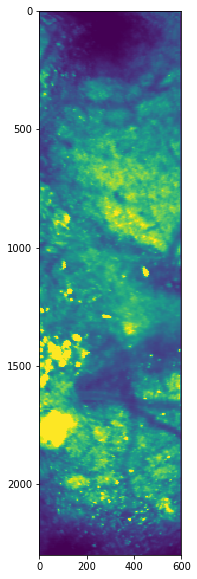

In [3]:
# Fetch from at-database

average_image_src = (pc.src_vmods['meso'].SummaryImages.Average & key_meso).fetch1('average_image')

# Calculate aspect ratio of pixels
px_height, px_width, um_height, um_width = (pc.src_vmods['meso'].ScanInfo.Field & key_meso).fetch1('px_height','px_width','um_height','um_width')
dx_height = um_height/px_height
dx_width = um_width/px_width
aspect_meso = dx_height/dx_width

print(np.nanmin(average_image_src), np.nanmax(average_image_src), np.shape(average_image_src), aspect_meso, dx_height, dx_width)

pyplot.figure(figsize = (10,10))
pyplot.imshow(average_image_src, vmin=0, vmax=300, aspect=aspect_meso, extent=[0,um_width,um_height,0])

-7.705667934838736 4686.442768033873 (460, 120) 1.0 5.0 5.0


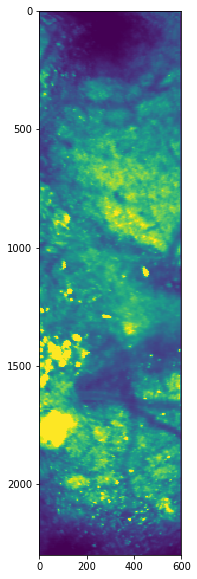

In [4]:
# Fetch from jr-database

average_image_dst = (pc.dst_vmods['meso'].SummaryImages.Average & key_meso).fetch1('average_image')

# Calculate aspect ratio of pixels
px_height, px_width, um_height, um_width = (pc.dst_vmods['meso'].ScanInfo.Field & key_meso).fetch1('px_height','px_width','um_height','um_width')
dx_height = um_height/px_height
dx_width = um_width/px_width
aspect_meso = dx_height/dx_width

print(np.nanmin(average_image_dst), np.nanmax(average_image_dst), np.shape(average_image_dst), aspect_meso, dx_height, dx_width)

pyplot.figure(figsize = (10,10))
pyplot.imshow(average_image_dst, vmin=0, vmax=300, aspect=aspect_meso, extent=[0,um_width,um_height,0])

-8.526512829121202e-14 8.526512829121202e-14


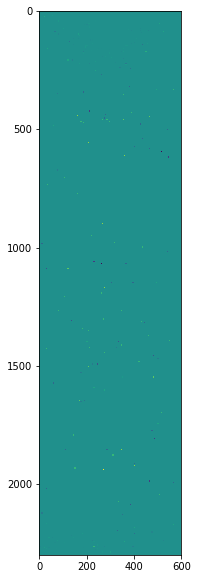

In [5]:
# Plot differences

average_image_diff = average_image_dst-average_image_src
print(np.nanmin(average_image_diff), np.nanmax(average_image_diff))

pyplot.figure(figsize = (10,10))
pyplot.imshow(average_image_diff, aspect=aspect_meso, extent=[0,um_width,um_height,0])